In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.misc #Used to show matrix as an image
import matplotlib.cm as cm #Used to display images in a specific colormap
import random #To pick random images to display
from scipy.special import expit #Vectorized sigmoid function

In [7]:
datafile = 'data/ex3data1.mat'
mat = scipy.io.loadmat( datafile )
X, y = mat['X'], mat['y']
#Insert a column of 1's to X as usual
X = np.insert(X,0,1,axis=1)
# print(f"'y' shape: {mat['y'].shape:%s}. Unique elements in y: {np.unique(mat['y']):%s}".)
# print("'X' shape: %s. X[0] shape: %s"%(X.shape,X[0].shape))
#X is 5000 images. Each image is a row. Each image has 400 pixels unrolled (20x20)
#y is a classification for each image. 1-10, where "10" is the handwritten "0"

In [18]:
def getDatumImg(row):
    """
    Function that is handed a single np array with shape 1x400,
    crates an image object from it, and returns it
    """
    width, height = 20, 20
    square = row[1:].reshape(width,height)
    return square.T
    
def displayData(indices_to_display = None):
    """
    Function that picks 100 random rows from X, creates a 20x20 image from each,
    then stitches them together into a 10x10 grid of images, and shows it.
    """
    width, height = 20, 20
    nrows, ncols = 10, 10
    if not indices_to_display:
        indices_to_display = random.sample(range(X.shape[0]), nrows*ncols)
        
    big_picture = np.zeros((height*nrows,width*ncols))
    
    irow, icol = 0, 0
    for idx in indices_to_display:
        if icol == ncols:
            irow += 1
            icol  = 0
        iimg = getDatumImg(X[idx])
        big_picture[irow*height:irow*height+iimg.shape[0],icol*width:icol*width+iimg.shape[1]] = iimg
        icol += 1
    fig = plt.figure(figsize=(6,6))
    img = scipy.misc.toimage( big_picture )
    plt.imshow(img,cmap = cm.Greys_r)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.


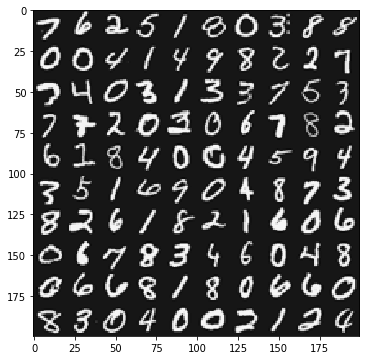

In [19]:
displayData()

In [26]:
y.shape

(5000, 1)

In [36]:
#Hypothesis function and cost function for logistic regression
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta))


def computeCost(mytheta,myX,myy,mylambda = 0.):
    m = myy.size
    myh = h(mytheta,myX)
    J = (((- myy).T @ np.log(myh)) - (1 - myy).T @ np.log(1 - myh)) / m
    rg_term = (mylambda / (2 * m)) * (mytheta.T @ mytheta)
    return J + rg_term

In [24]:
def costGradient(mytheta,myX,myy,mylambda = 0.):
    m = myy.size
    myh = h(mytheta,myX)    
    grad = (myh - y)

array([[-1., -1., -1.],
       [-1., -1., -1.],
       [-1., -1., -1.]])

In [30]:
initial_theta = np.zeros((X.shape[1],1))

In [37]:
computeCost(initial_theta,X,y)

array([[-17.05142064]])

In [38]:
A = np.arange(1,20,2)

In [45]:
print(A.reshape(-1))

[ 1  3  5  7  9 11 13 15 17 19]
